In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
from datetime import date
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, LabelEncoder,StandardScaler,RobustScaler

def load_application_train():
    data = pd.read_csv("application_train.csv")
    return data 

def load_titanic():
    data = pd.read_csv("titanic.csv")
    return data 

df = load_titanic()
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [2]:
def grab_cols(df):
    num_cols = [col for col in df.columns if np.issubdtype(df[col],np.number)]
    cat_cols = [col for col in df.columns if col not in num_cols]
    num_but_cat = [col for col in num_cols if df[col].nunique()<10]
    cat_but_car = [col for col in cat_cols if df[col].nunique() >20]
    cat_cols = cat_cols + num_but_cat 
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    print(f"cat_cols = {len(cat_cols)}")
    print(f"num_cols = {len(num_cols)}")
    print(f"num_but_cat = {len(num_but_cat)}")
    print(f"cat_but_car= {len(cat_but_car)}")
    return cat_cols,num_cols,cat_but_car,num_but_cat

cat_cols,num_cols,cat_but_car,num_but_cat = grab_cols(df)

cat_cols = 6
num_cols = 3
num_but_cat = 4
cat_but_car= 3


In [3]:
df.isnull().values.any()

True

In [4]:
df.isnull().sum().sum()

866

In [5]:
df[df.isnull().any(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S


In [6]:
df[df.notnull().all(axis=1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [7]:
(df.isnull().sum() / len(df) *100).sort_values(ascending =False)

Cabin          77.104377
Age            19.865320
Embarked        0.224467
PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
dtype: float64

In [8]:
na_cols = [col for col in df.columns if df[col].isnull().sum()>0]
na_cols

['Age', 'Cabin', 'Embarked']

In [9]:
def missing_values_table(df,na_name=False):
    na_cols = [col for col in df.columns if df[col].isnull().sum()>0]
    n_miss = df[na_cols].isnull().sum().sort_values(ascending=False)
    ratio = (df[na_cols].isnull().sum() / len(df)*100).sort_values(ascending=False)
    missing_df = pd.concat([n_miss,np.round(ratio,2)],axis=1,keys=["n_miss","ratio"])
    
    return na_cols,missing_df

na_cols,missing_df = missing_values_table(df)
missing_df

,n_miss,ratio
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [10]:
df[["Age","Fare"]].mean(axis=0)

Age     29.699118
Fare    32.204208
dtype: float64

In [11]:
df[["Age","Fare"]].mean(axis=1)

0      14.62500
1      54.64165
2      16.96250
3      44.05000
4      21.52500
         ...   
886    20.00000
887    24.50000
888    23.45000
889    28.00000
890    19.87500
Length: 891, dtype: float64

In [12]:
df.loc[0,"Pclass"] = np.nan

In [13]:
df[cat_cols]

,Sex,Embarked,Survived,Pclass,SibSp,Parch
0,male,S,0,NaN,1,0
1,female,C,1,1.0,1,0
2,female,S,1,3.0,0,0
3,female,S,1,1.0,1,0
4,male,S,0,3.0,0,0
...,...,...,...,...,...,...
886,male,S,0,2.0,0,0
887,female,S,1,1.0,0,0
888,female,S,0,3.0,1,2
889,male,C,1,1.0,0,0


In [14]:
df[cat_cols] = df[cat_cols].astype("O")

In [15]:
from feature_engine.imputation import CategoricalImputer
imputer = CategoricalImputer(imputation_method="frequent",variables=cat_cols)
imputer.fit(df[cat_cols])

CategoricalImputer(imputation_method='frequent',
                   variables=['Sex', 'Embarked', 'Survived', 'Pclass', 'SibSp',
                              'Parch'])

In [16]:
imputer.transform(df[cat_cols])

,Sex,Embarked,Survived,Pclass,SibSp,Parch
0,male,S,0,3.0,1,0
1,female,C,1,1.0,1,0
2,female,S,1,3.0,0,0
3,female,S,1,1.0,1,0
4,male,S,0,3.0,0,0
...,...,...,...,...,...,...
886,male,S,0,2.0,0,0
887,female,S,1,1.0,0,0
888,female,S,0,3.0,1,2
889,male,C,1,1.0,0,0


In [17]:
df = load_titanic()

In [18]:
df.groupby("Sex")["Age"].mean()

Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

In [19]:
df["Age"].fillna(df.groupby("Sex")["Age"].transform("mean")).mean()

29.736034227171306

In [20]:
df.shape

(891, 12)

In [21]:
df.groupby("Sex")["Age"].transform("mean")

0      30.726645
1      27.915709
2      27.915709
3      27.915709
4      30.726645
         ...    
886    30.726645
887    27.915709
888    27.915709
889    30.726645
890    30.726645
Name: Age, Length: 891, dtype: float64

In [22]:
df["Embarked"].isnull().sum()

2

In [23]:
df.groupby("Embarked")["Age"].mean()

Embarked
C    30.814769
Q    28.089286
S    29.445397
Name: Age, dtype: float64

In [24]:
df.groupby("Embarked")["Age"].transform("mean")

0      29.445397
1      30.814769
2      29.445397
3      29.445397
4      29.445397
         ...    
886    29.445397
887    29.445397
888    29.445397
889    30.814769
890    28.089286
Name: Age, Length: 891, dtype: float64

In [25]:
df[["Embarked","Sex","Age"]]

,Embarked,Sex,Age
0,S,male,22.0
1,C,female,38.0
2,S,female,26.0
3,S,female,35.0
4,S,male,35.0
...,...,...,...
886,S,male,27.0
887,S,female,19.0
888,S,female,NaN
889,C,male,26.0


In [26]:
df.groupby(["Embarked","Sex"])["Age"].transform("mean")

0      30.291440
1      28.344262
2      27.771505
3      27.771505
4      30.291440
         ...    
886    30.291440
887    27.771505
888    27.771505
889    32.998841
890    30.937500
Name: Age, Length: 891, dtype: float64

In [27]:
df.groupby(["Embarked","Sex"])["Age"].mean()

Embarked  Sex   
C         female    28.344262
          male      32.998841
Q         female    24.291667
          male      30.937500
S         female    27.771505
          male      30.291440
Name: Age, dtype: float64

In [28]:
df.loc[df["Embarked"].isnull(),"Age"] = np.nan

In [29]:
df.groupby(["Embarked","Sex"])["Age"].transform("mean").isnull().sum()

2

In [30]:
df["Age"]= df["Age"].fillna(df.groupby(["Embarked","Sex"])["Age"].transform("mean"))

In [31]:
df.loc[df["Age"].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,NaN,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,NaN,0,0,113572,80.0,B28,NaN


In [32]:
df.groupby(["Embarked","Sex"])["Age"].mean()

Embarked  Sex   
C         female    28.344262
          male      32.998841
Q         female    24.291667
          male      30.937500
S         female    27.771505
          male      30.291440
Name: Age, dtype: float64

In [33]:
df = load_titanic()

In [34]:
num_cols = ['Age', 'Fare']

<Axes: >

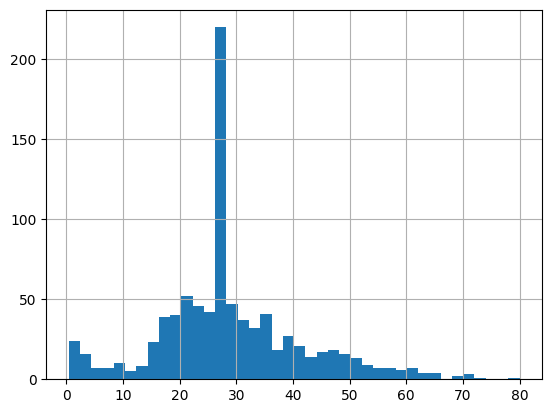

In [35]:
df["Age"].fillna(df["Age"].median()).hist(bins=40)

<Axes: >

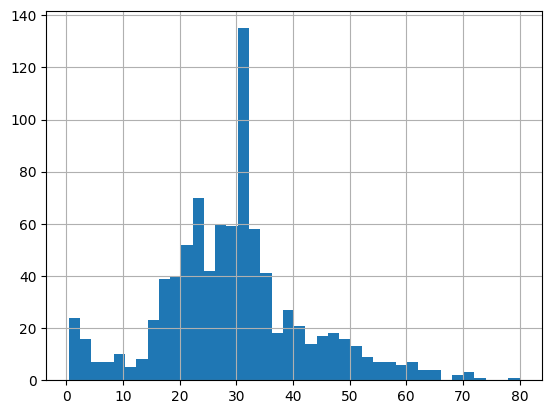

In [36]:
df["Age"].fillna(df.groupby(["Sex","Embarked"])["Age"].transform("mean")).hist(bins=40)

In [37]:
df["Age"].mean()

29.69911764705882

In [38]:
df["Embarked"].mode()[0]

'S'

In [39]:
df["Embarked"] = df["Embarked"].fillna(df["Embarked"].mode()[0])

In [40]:
from feature_engine.encoding import OneHotEncoder
ohe_c = OneHotEncoder(
    variables=["Embarked","Sex"],
    drop_last=True
)
df2=ohe_c.fit_transform(df)
df2.drop(["Name","Ticket","Cabin"],axis=1,inplace=True)
df2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,1,0
2,3,1,3,26.0,0,0,7.9250,1,0,0
3,4,1,1,35.0,1,0,53.1000,1,0,0
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [41]:
sc = MinMaxScaler().set_output(transform="pandas")
df2=sc.fit_transform(df2)
df2.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,1.0,0.0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [42]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5).set_output(transform="pandas")
df3=imputer.fit_transform(df2)
df3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male
0,0.000000,0.0,1.0,0.271174,0.125,0.0,0.014151,1.0,0.0,1.0
1,0.001124,1.0,0.0,0.472229,0.125,0.0,0.139136,0.0,1.0,0.0
2,0.002247,1.0,1.0,0.321438,0.000,0.0,0.015469,1.0,0.0,0.0
3,0.003371,1.0,0.0,0.434531,0.125,0.0,0.103644,1.0,0.0,0.0
4,0.004494,0.0,1.0,0.434531,0.000,0.0,0.015713,1.0,0.0,1.0


In [43]:
df3=pd.DataFrame(sc.inverse_transform(df3),columns=df3.columns)
df3.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


In [44]:
a=df["Age"].fillna(df.groupby(["Sex","Embarked"])["Age"].transform("mean"))

<Axes: ylabel='Density'>

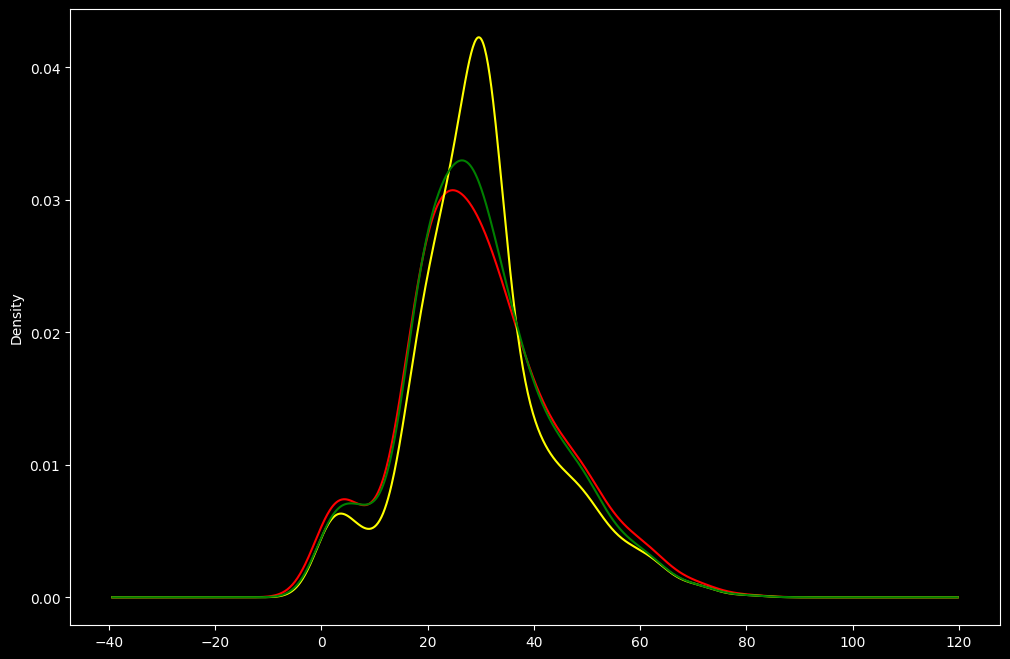

In [45]:
plt.style.use("dark_background")
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

df["Age"].plot(kind="kde",ax=ax,color="red")
a.plot(kind="kde",ax=ax,color="yellow")
df3["Age"].plot(kind="kde",ax=ax,color="green")

In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import Ridge
from xgboost import XGBRegressor
imp= IterativeImputer(
    estimator=XGBRegressor(n_estimators=200),
    max_iter=30,
    random_state=0
).set_output(transform="pandas")

df4=imp.fit_transform(df2)

In [47]:
df2

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male
0,0.000000,0.0,1.0,0.271174,0.125,0.000000,0.014151,1.0,0.0,1.0
1,0.001124,1.0,0.0,0.472229,0.125,0.000000,0.139136,0.0,1.0,0.0
2,0.002247,1.0,1.0,0.321438,0.000,0.000000,0.015469,1.0,0.0,0.0
3,0.003371,1.0,0.0,0.434531,0.125,0.000000,0.103644,1.0,0.0,0.0
4,0.004494,0.0,1.0,0.434531,0.000,0.000000,0.015713,1.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...
886,0.995506,0.0,0.5,0.334004,0.000,0.000000,0.025374,1.0,0.0,1.0
887,0.996629,1.0,0.0,0.233476,0.000,0.000000,0.058556,1.0,0.0,0.0
888,0.997753,0.0,1.0,NaN,0.125,0.333333,0.045771,1.0,0.0,0.0
889,0.998876,1.0,0.0,0.321438,0.000,0.000000,0.058556,0.0,1.0,1.0


In [48]:
df4=pd.DataFrame(sc.inverse_transform(df4),columns=df4.columns)
df4.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_S,Embarked_C,Sex_male
0,1.0,0.0,3.0,22.0,1.0,0.0,7.2500,1.0,0.0,1.0
1,2.0,1.0,1.0,38.0,1.0,0.0,71.2833,0.0,1.0,0.0
2,3.0,1.0,3.0,26.0,0.0,0.0,7.9250,1.0,0.0,0.0
3,4.0,1.0,1.0,35.0,1.0,0.0,53.1000,1.0,0.0,0.0
4,5.0,0.0,3.0,35.0,0.0,0.0,8.0500,1.0,0.0,1.0


<Axes: ylabel='Density'>

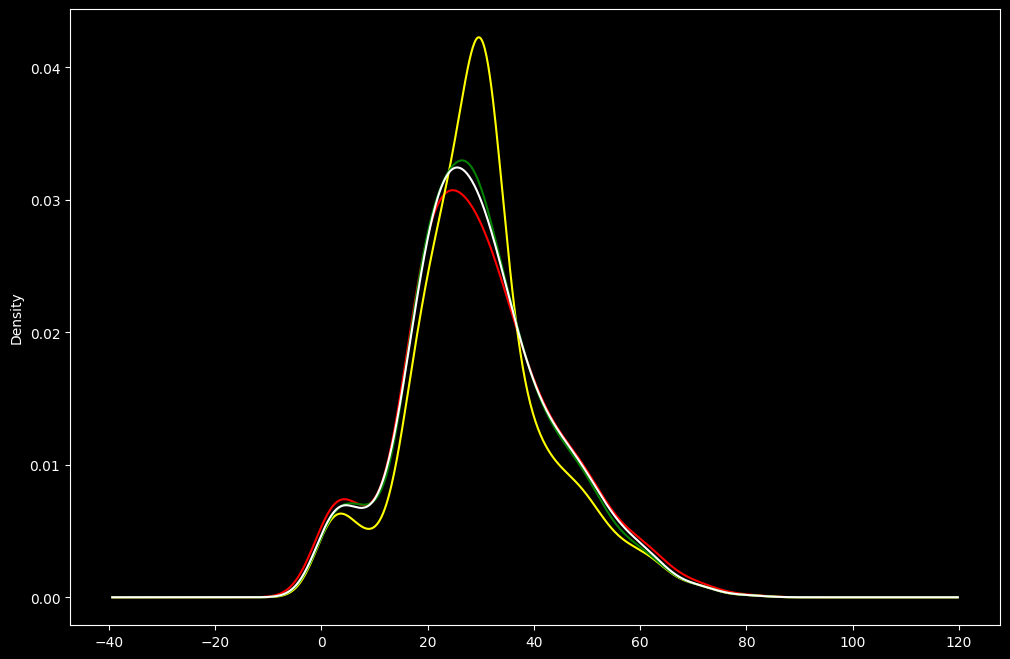

In [49]:
plt.style.use("dark_background")
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)

df["Age"].plot(kind="kde",ax=ax,color="red")
a.plot(kind="kde",ax=ax,color="yellow")
df3["Age"].plot(kind="kde",ax=ax,color="green")
df4["Age"].plot(kind="kde",ax=ax,color="white")


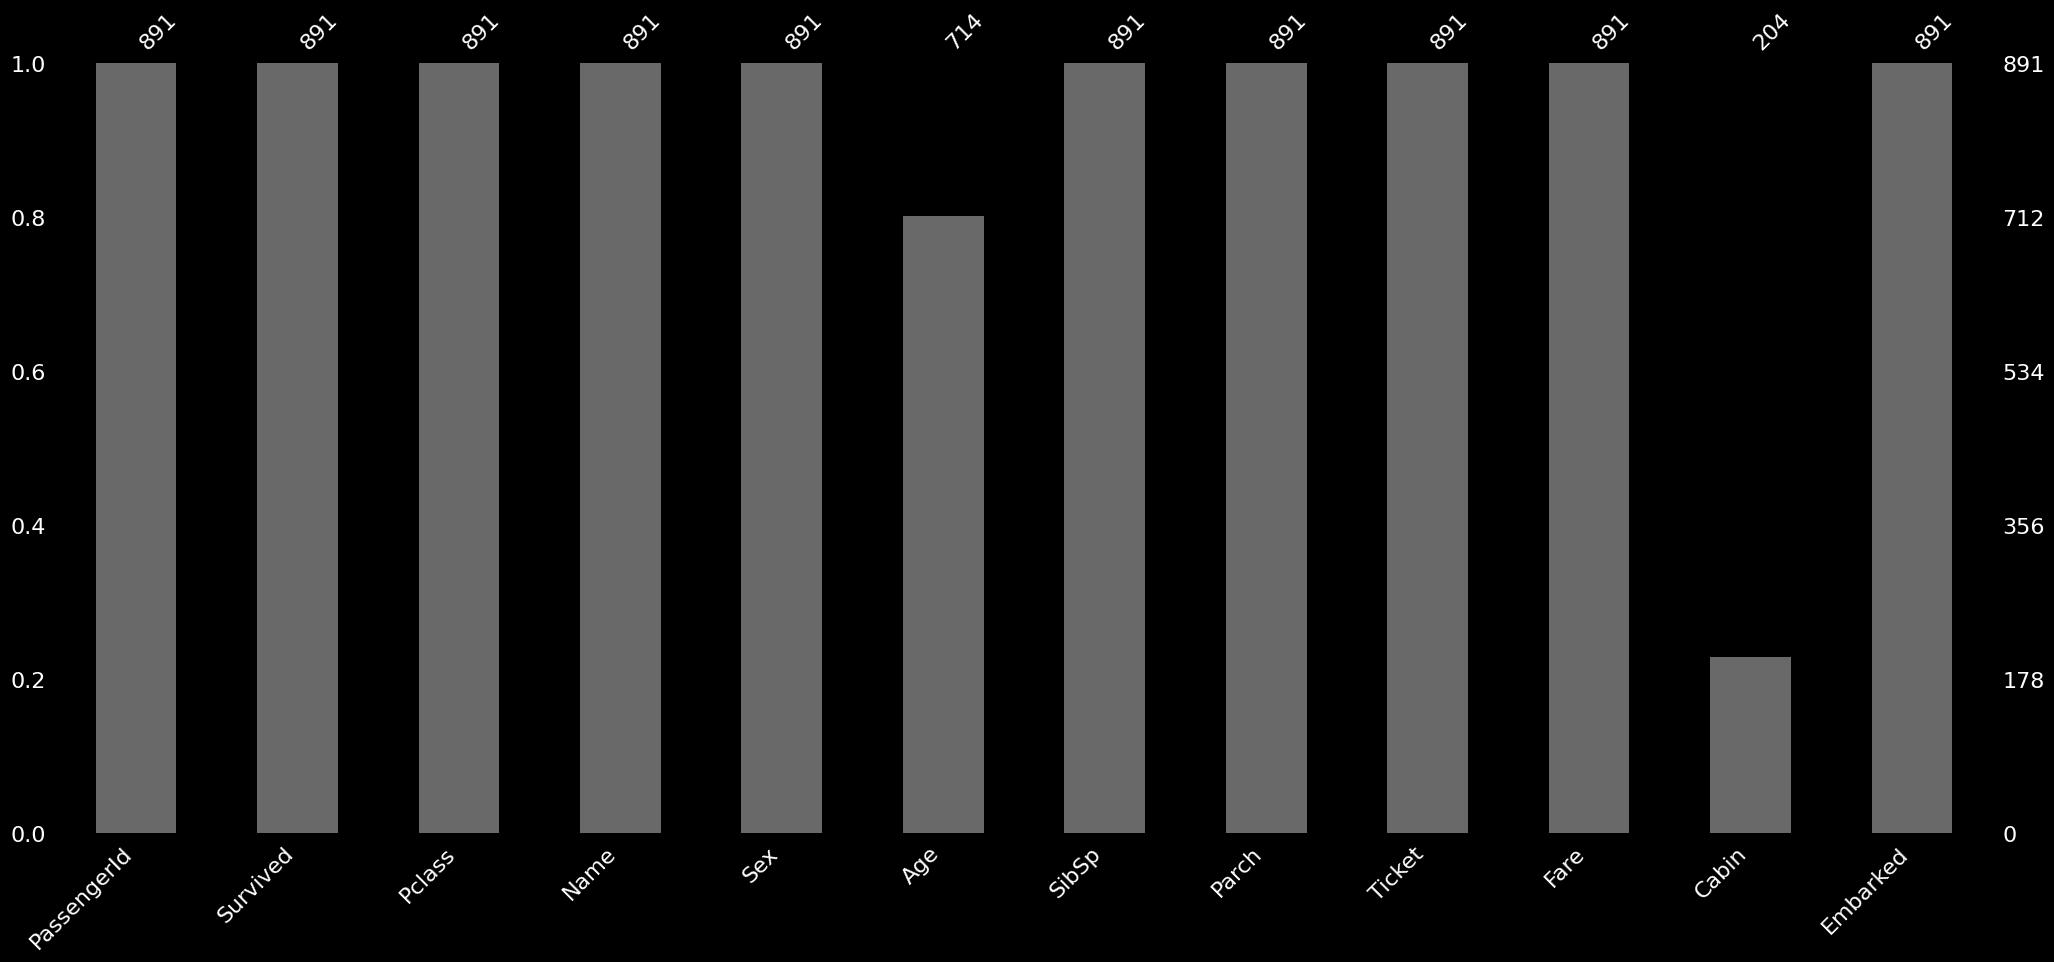

In [50]:
msno.bar(df)
plt.show()

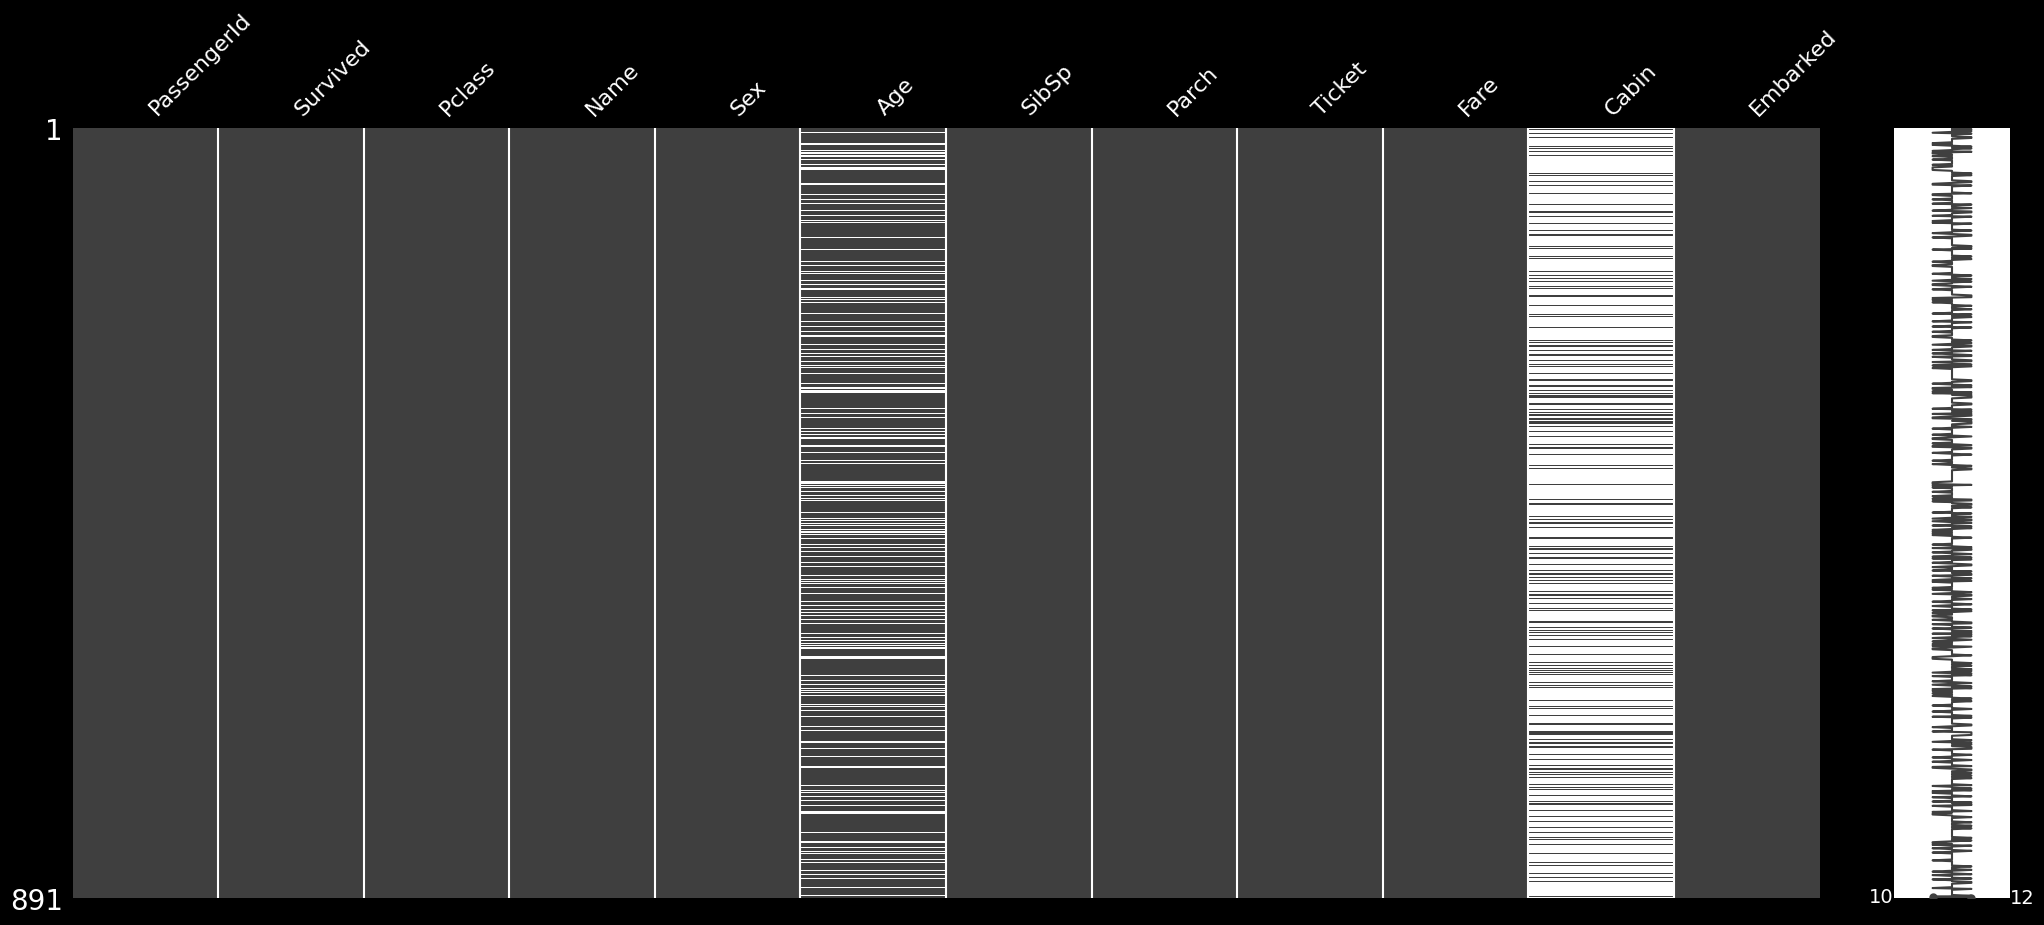

In [51]:
msno.matrix(df)
plt.show()

In [52]:
from matplotlib import style
  
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


In [53]:
plt.style.use('ggplot')

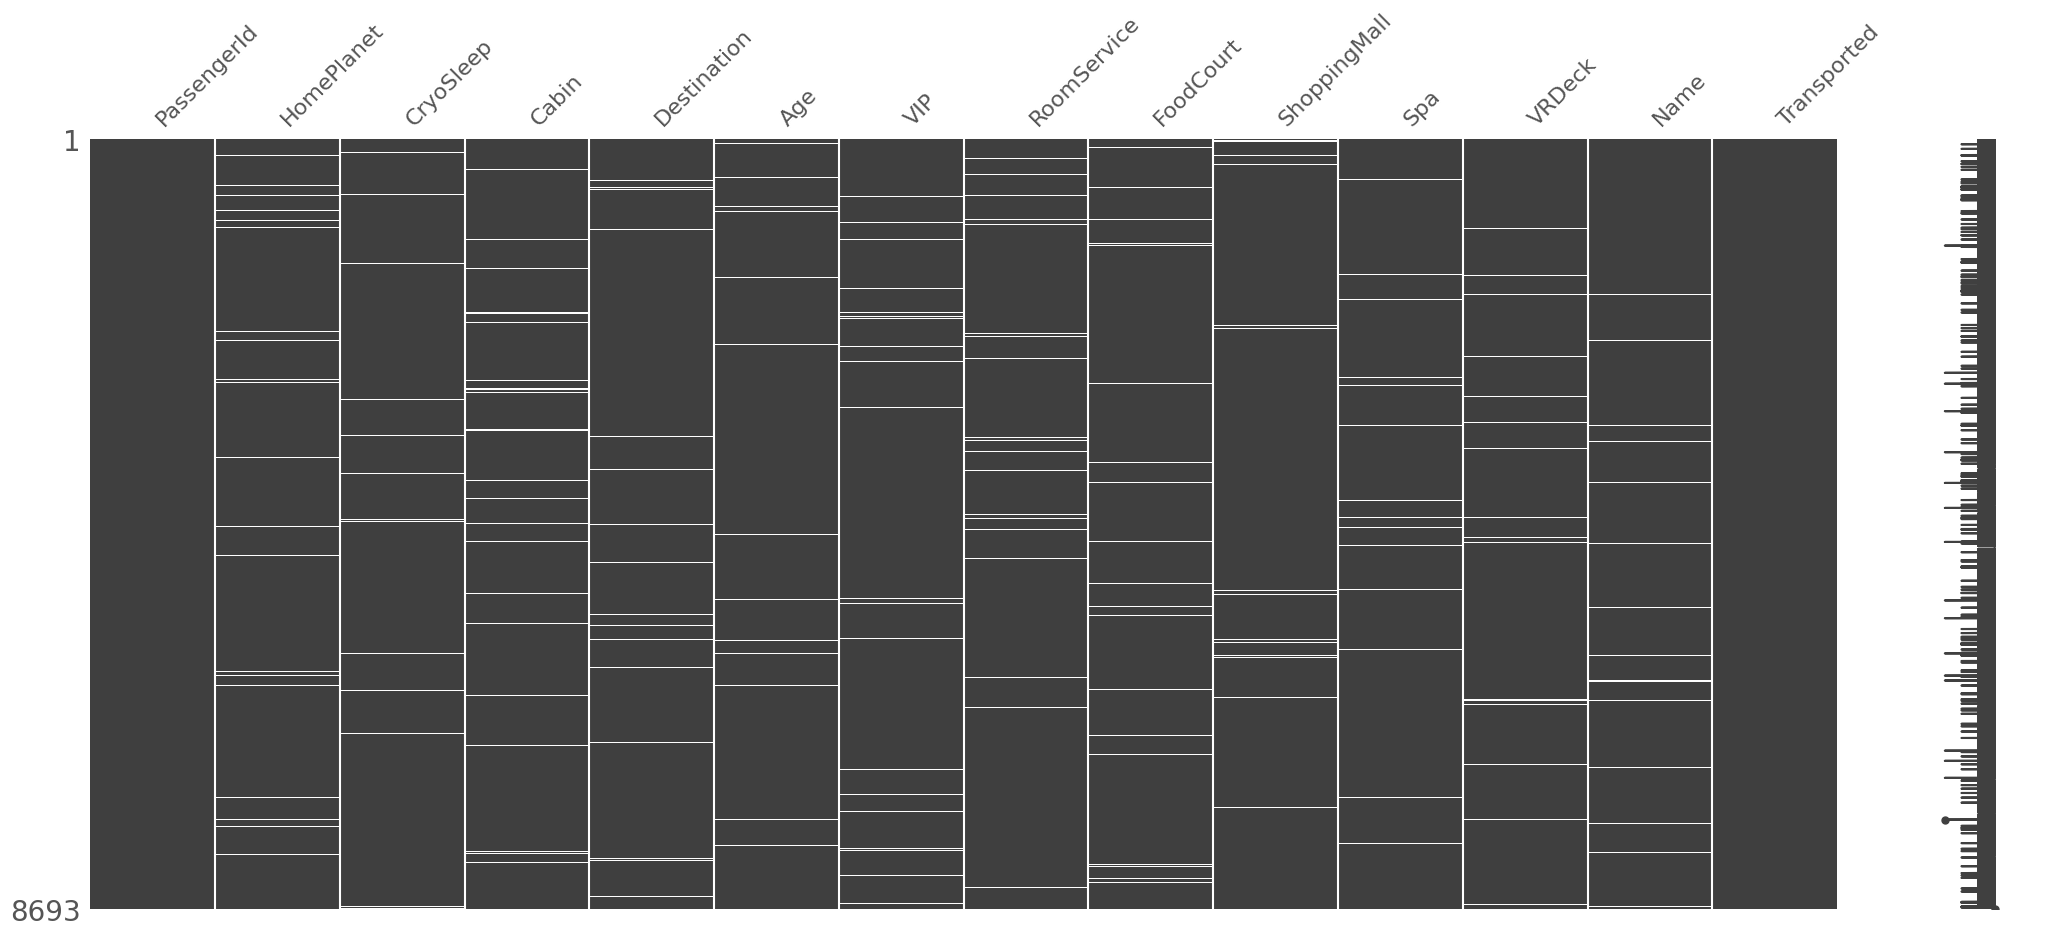

In [54]:
dff = pd.read_csv("train.csv")
msno.matrix(dff)
plt.show()

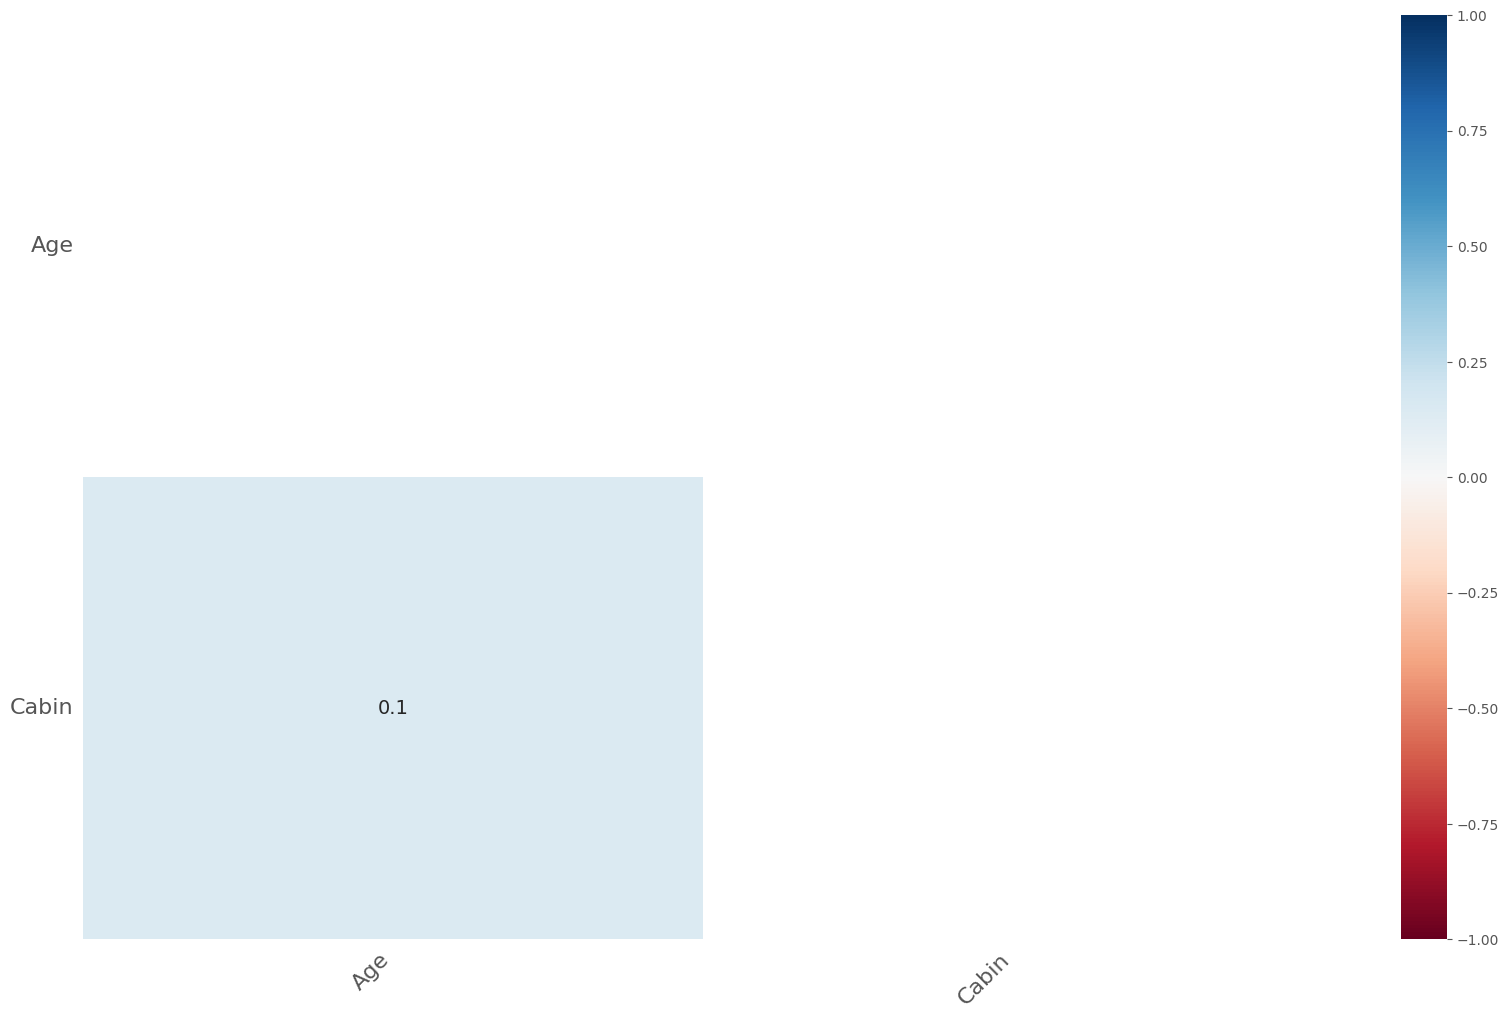

In [55]:
msno.heatmap(df)
plt.show()

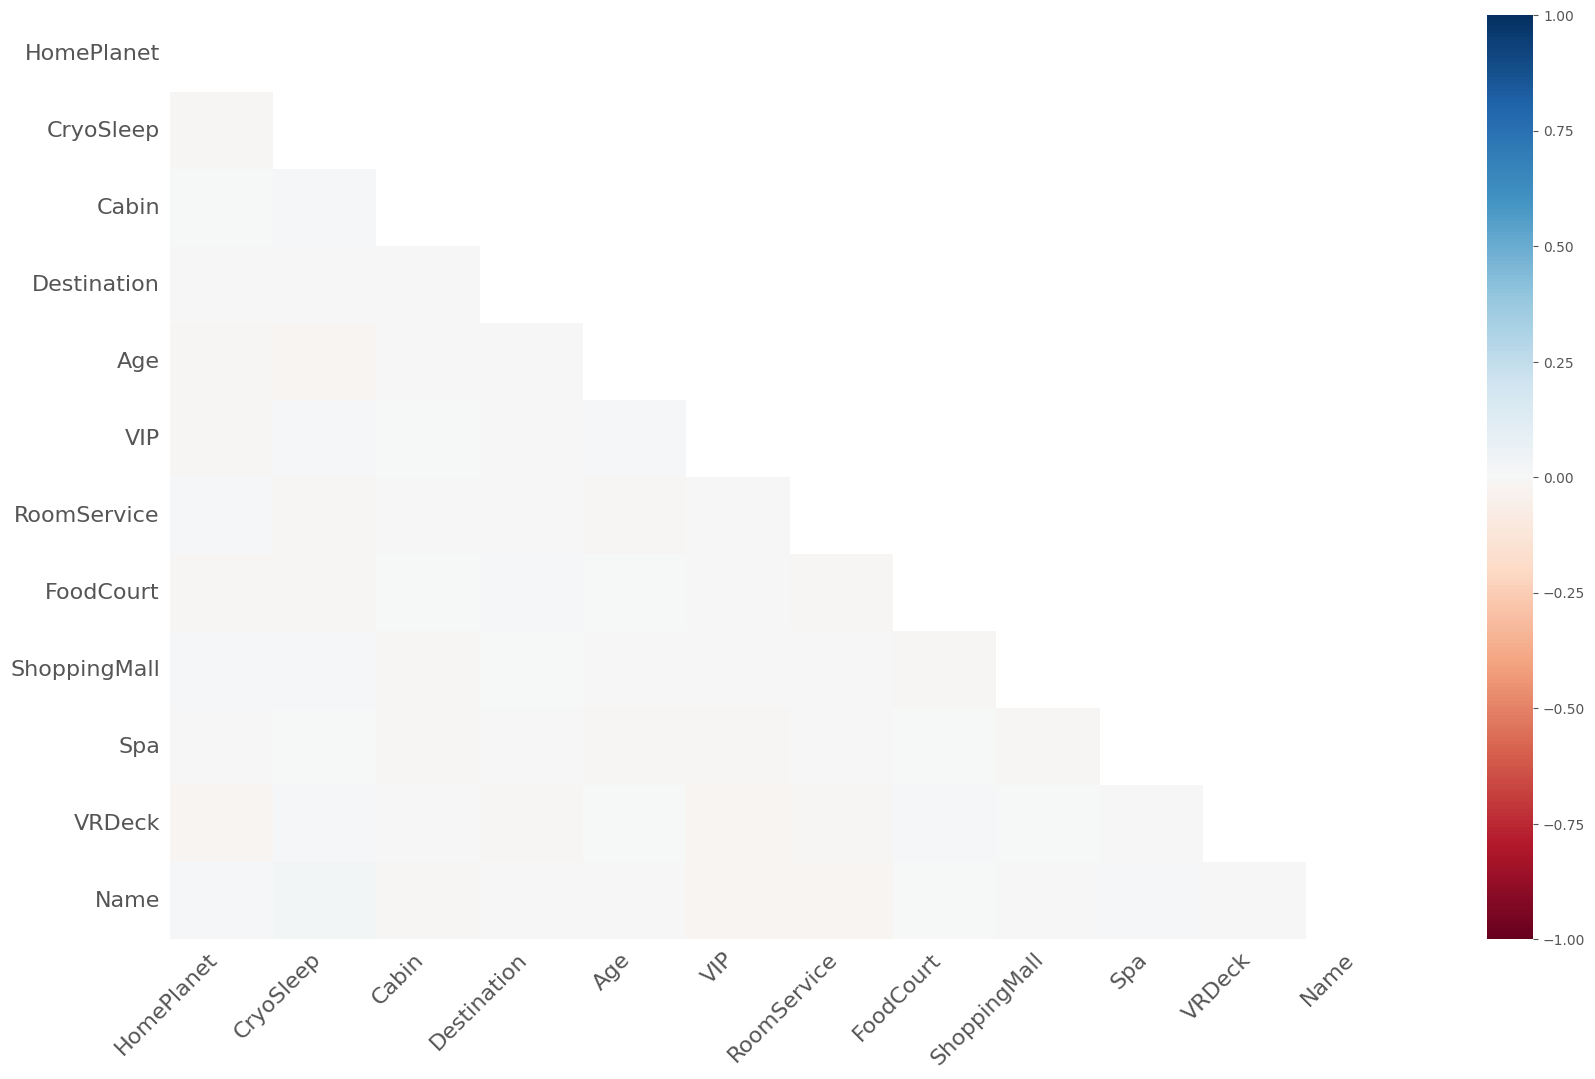

In [56]:
msno.heatmap(dff)
plt.show()

In [57]:
dff.isnull().corr()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
HomePlanet,NaN,1.000000,-0.014804,0.007158,-0.001113,-0.011528,-0.008585,0.009729,-0.011897,0.010972,-0.006565,-0.017612,0.012128,NaN
CryoSleep,NaN,-0.014804,1.000000,0.010020,-0.002798,-0.018008,0.009436,-0.013004,-0.008055,0.013547,0.002218,0.011694,0.024627,NaN
Cabin,NaN,0.007158,0.010020,1.000000,-0.000894,-0.000529,0.006891,-0.000773,0.004344,-0.013899,-0.011730,-0.001606,-0.013228,NaN
Destination,NaN,-0.001113,-0.002798,-0.000894,1.000000,-0.004230,-0.001331,-0.004443,0.012138,0.003392,-0.004653,-0.010694,-0.001004,NaN
Age,NaN,-0.011528,-0.018008,-0.000529,-0.004230,1.000000,0.009762,-0.015471,0.001308,-0.001500,-0.015620,0.000717,-0.006042,NaN
VIP,NaN,-0.008585,0.009436,0.006891,-0.001331,0.009762,1.000000,-0.001210,-0.001451,-0.004273,-0.012063,-0.017753,-0.018648,NaN
RoomService,NaN,0.009729,-0.013004,-0.000773,-0.004443,-0.015471,-0.001210,1.000000,-0.010160,-0.001744,-0.004548,-0.010603,-0.017004,NaN
FoodCourt,NaN,-0.011897,-0.008055,0.004344,0.012138,0.001308,-0.001451,-0.010160,1.000000,-0.012473,0.006406,0.011251,0.004221,NaN
ShoppingMall,NaN,0.010972,0.013547,-0.013899,0.003392,-0.001500,-0.004273,-0.001744,-0.012473,1.000000,-0.012473,0.007771,-0.003944,NaN


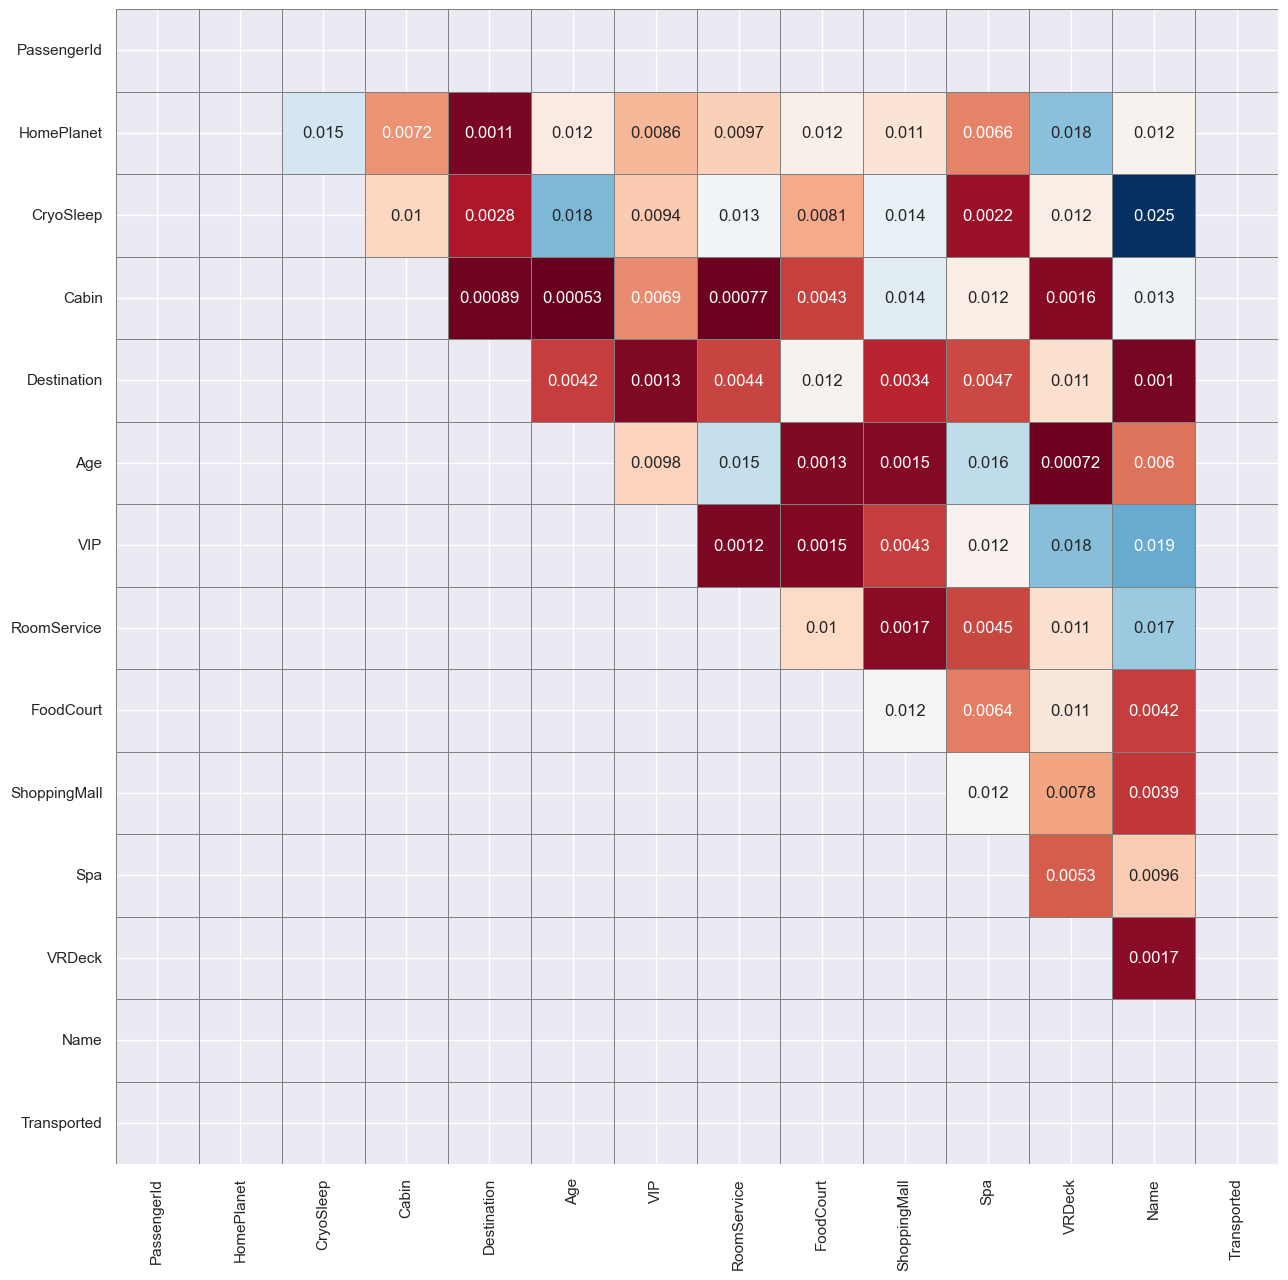

[]

In [58]:
def high_correlated_cols(dataframe, plot=False, corr_th=0.9):
    corr = dataframe.corr()
    cor_matrix = corr.abs()
    upper_triangle_matrix = cor_matrix.where(np.triu(np.ones(cor_matrix.shape), k=1).astype(bool))
    drop_list = [col for col in upper_triangle_matrix.columns if any(upper_triangle_matrix[col] > corr_th)]
    
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        
        # upper_triangle_matrix'ı görselleştirmek için aşağıdaki satırı kullanabilirsiniz.
        sns.heatmap(upper_triangle_matrix, cmap="RdBu", annot=True, cbar=False, linewidths=0.5, linecolor='gray')
        plt.show()
    return drop_list
high_correlated_cols(dff.isnull().astype(int),plot=True)


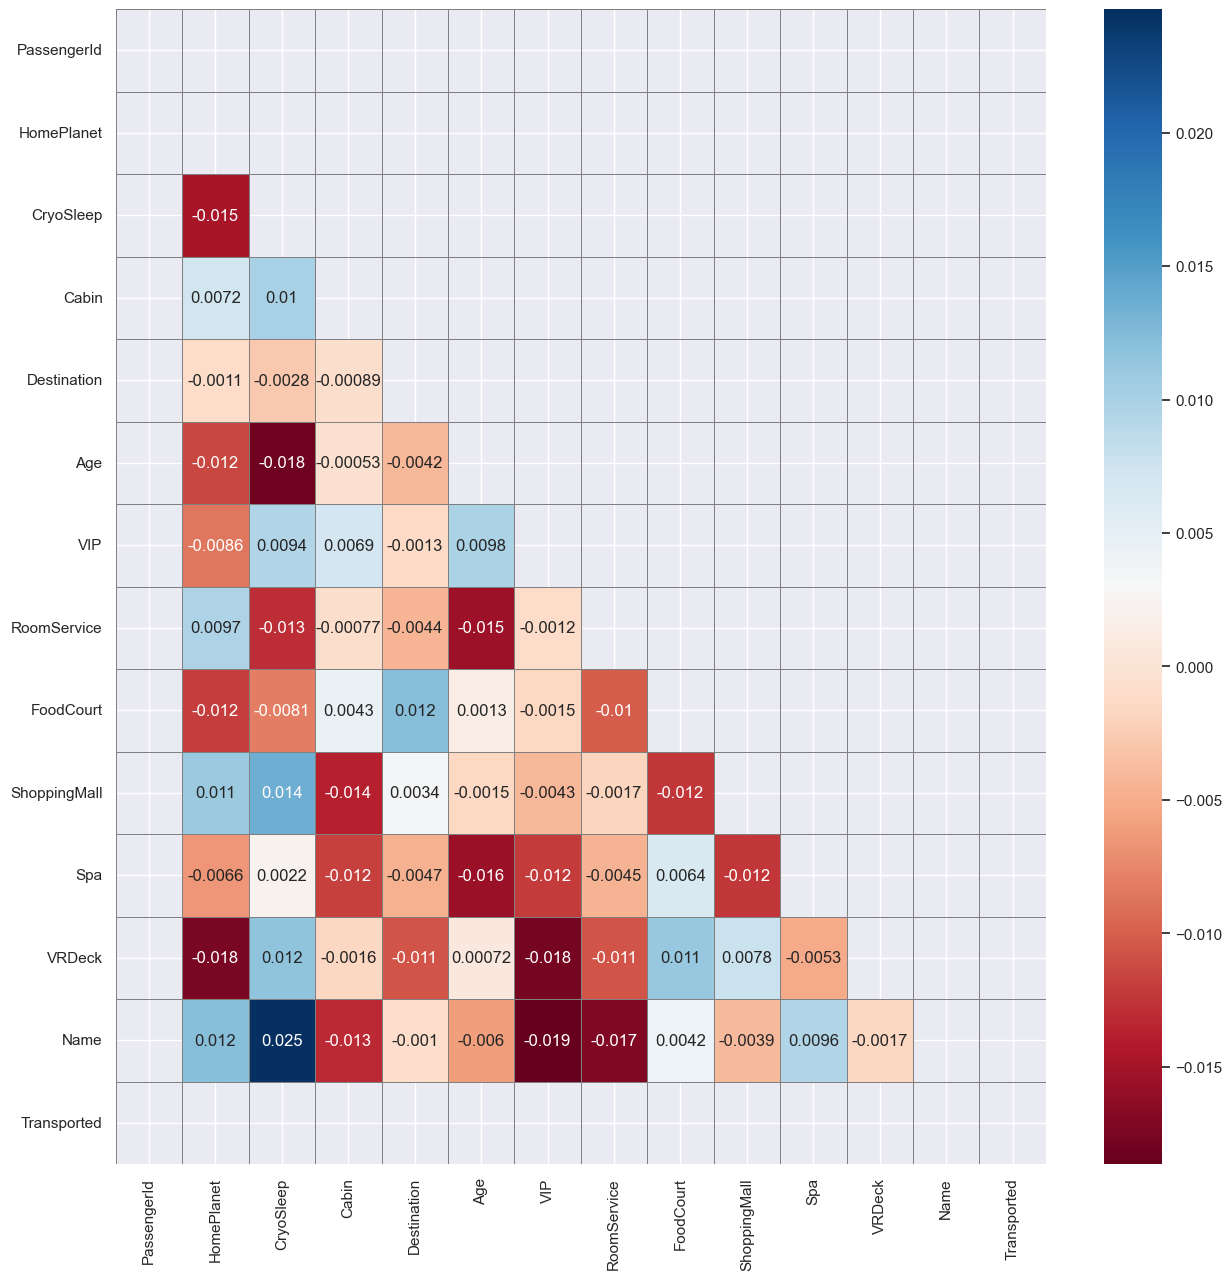

In [59]:
def high_correlated_cols(dataframe, plot=False):
    corr = dataframe.corr()
    lower_triangle_matrix = corr.where(np.tril(np.ones(corr.shape), k=-1).astype(bool))
    
    if plot:
        import seaborn as sns
        import matplotlib.pyplot as plt
        sns.set(rc={'figure.figsize': (15, 15)})
        
        # lower_triangle_matrix'ı görselleştirmek için aşağıdaki satırı kullanabilirsiniz.
        sns.heatmap(lower_triangle_matrix, cmap="RdBu", annot=True, cbar=True, linewidths=0.5, linecolor='gray')
        plt.show()
high_correlated_cols(dff.isnull(),plot=True)


In [60]:
df= load_titanic()
na_cols,missing_df = missing_values_table(df)
missing_df

,n_miss,ratio
Cabin,687,77.10
Age,177,19.87
Embarked,2,0.22


In [61]:
def missing_vs_target(df,target,na_cols):
    temp_df=df.copy()
    for col in na_cols:
        temp_df[col+"_NA_Flag"] = np.where(temp_df[col].isnull(),1,0)
    na_flags=[col for col in temp_df.columns if "_NA_" in col]
    for col in na_flags:
        print(pd.DataFrame({"Target_Mean":temp_df.groupby(col)[target].mean(),
                            "Count":temp_df.groupby(col)[target].count()}))
        print("-----------------------------------------------")

missing_vs_target(df,"Survived",na_cols)

             Target_Mean  Count
Age_NA_Flag                    
0               0.406162    714
1               0.293785    177
-----------------------------------------------
               Target_Mean  Count
Cabin_NA_Flag                    
0                 0.666667    204
1                 0.299854    687
-----------------------------------------------
                  Target_Mean  Count
Embarked_NA_Flag                    
0                    0.382452    889
1                    1.000000      2
-----------------------------------------------


In [63]:
def missing_vs_target(df,target,na_cols):
    temp_df=df.copy()
    for col in na_cols:
        temp_df[col+"_NA_Flag"] = np.where(temp_df[col].isnull(),1,temp_df[col])
    na_flags=[col for col in temp_df.columns if "_NA_" in col]
    for col in na_flags:
        print(pd.DataFrame({"Target_Mean":temp_df.groupby(col)[target].mean(),
                            "Count":temp_df.groupby(col)[target].count()}))
        print("-----------------------------------------------")

missing_vs_target(df,"Survived",na_cols)

             Target_Mean  Count
Age_NA_Flag                    
0.42                 1.0      1
0.67                 1.0      1
0.75                 1.0      2
0.83                 1.0      2
0.92                 1.0      1
...                  ...    ...
70.00                0.0      2
70.50                0.0      1
71.00                0.0      2
74.00                0.0      1
80.00                1.0      1

[88 rows x 2 columns]
-----------------------------------------------
               Target_Mean  Count
Cabin_NA_Flag                    
1                 0.299854    687
A10               0.000000      1
A14               0.000000      1
A16               1.000000      1
A19               0.000000      1
...                    ...    ...
F33               1.000000      3
F38               0.000000      1
F4                1.000000      2
G6                0.500000      4
T                 0.000000      1

[148 rows x 2 columns]
-----------------------------------------------

In [62]:
df.isnull().values.any()

True